In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO

In [75]:
mut_and_host_info_file = "../../../intermediate-results-downsampling/isolating_clade/asian_mut_and_host_info_by_tip.json"
with open(mut_and_host_info_file, 'r') as infile:
    mut_and_host_info_by_tip = json.load(infile)

In [76]:
def extract_gene_lengths(genbank_file):
    gene_lengths = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
        gene_lengths['rdrp'] = gene_lengths.pop("rna-dependent rna polymerase")
        gene_lengths['2Omethyltransferase'] = gene_lengths.pop("2'-o-methyltransferase")
    return gene_lengths 

genbank_file = "../../../../nextstrain-build/phylogenetic_subsampling/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196 / 3
gene_codon_counts["s2"] = 1806 / 3

print(gene_codon_counts)


{'orf1ab': 4392.0, 'nsp1': 193.0, 'nsp2': 660.0, 'nsp3': 1887.0, 'nsp4': 507.0, 'nsp5': 306.0, 'nsp6': 292.0, 'nsp7': 83.0, 'nsp8': 199.0, 'nsp9': 110.0, 'nsp10': 140.0, 'hel': 598.0, 'exon': 524.0, 'nendou': 343.0, 'nsp11': 14.0, 's': 1354.0, 'orf3': 104.0, 'orf4a': 110.0, 'orf4b': 247.0, 'orf5': 225.0, 'e': 83.0, 'm': 220.0, 'n': 414.0, 'orf8b': 113.0, 'rdrp': 933.0, '2Omethyltransferase': 303.0, 's1': 732.0, 's2': 602.0}


In [77]:
all_genes = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRpa",
                 "RdRpb",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]
data = []
for tip, info in mut_and_host_info_by_tip.items():
    row = {'sample': tip, 'date': info['date']}
    for gene in all_genes:
        if gene == "RdRpa" or gene == "RdRpb":
            num_mutations = len(info['muts_on_path'].get("RdRpa", [])) + len(info['muts_on_path'].get("RdRpb", []))
            num_codons = gene_codon_counts["rdrp"]  # default to 1 if gene not found
            mutation_rate = num_mutations / num_codons
            row["rdrp"] = mutation_rate
        else:
            num_mutations = len(info['muts_on_path'].get(gene, []))
            gene = gene.lower()
            if gene == "2omethyltransferase":
                num_codons = gene_codon_counts['2Omethyltransferase']
            else:
                num_codons = gene_codon_counts[gene]  # default to 1 if gene not found
            mutation_rate = num_mutations / num_codons
            row[gene] = mutation_rate
    data.append(row)
df = pd.DataFrame(data)
mutation_rate_by_gene = df.to_csv('../../../intermediate-results-downsampling/isolating_clade/mutation_rate_by_gene.csv')

<Figure size 640x480 with 0 Axes>

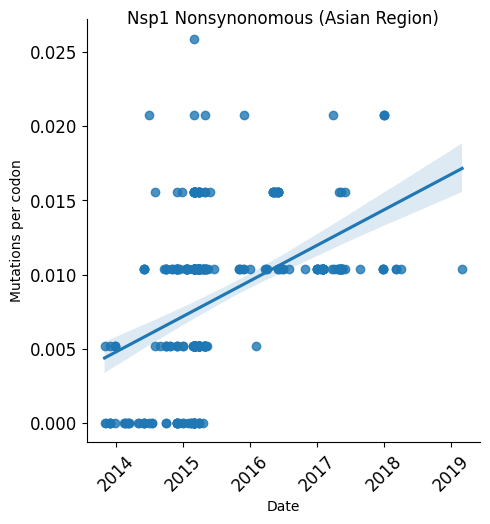

Camel slope: 0.0023982317958661436 mutations per codon per year
P = 3.3292554303673664e-18


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

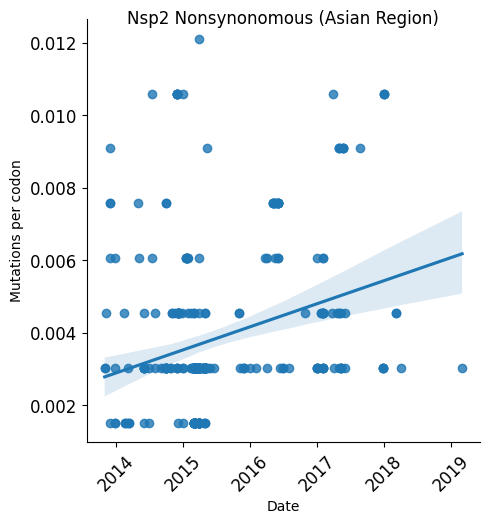

Camel slope: 0.0006375706239992616 mutations per codon per year
P = 3.20062534016057e-07


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

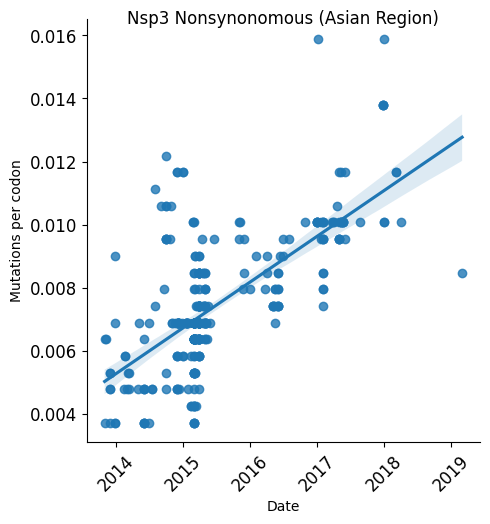

Camel slope: 0.0014534494963091417 mutations per codon per year
P = 4.618505015283912e-46


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

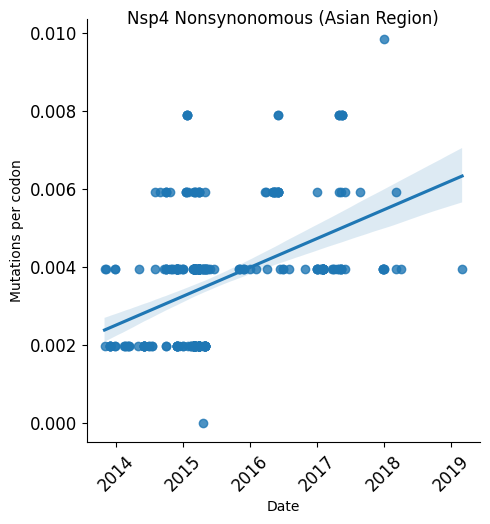

Camel slope: 0.0007416330529745921 mutations per codon per year
P = 3.151342111030307e-18


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

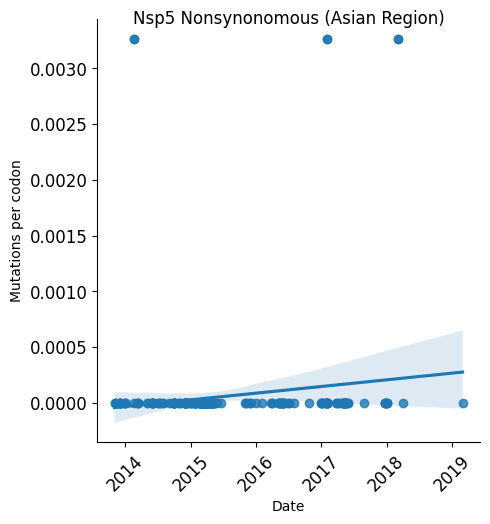

Camel slope: 5.983976678965661e-05 mutations per codon per year
P = 0.01379890302023775


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

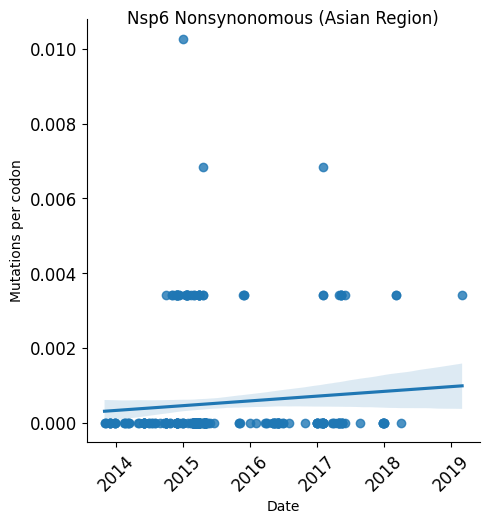

Camel slope: 0.0001274257458742153 mutations per codon per year
P = 0.09922131721179026


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

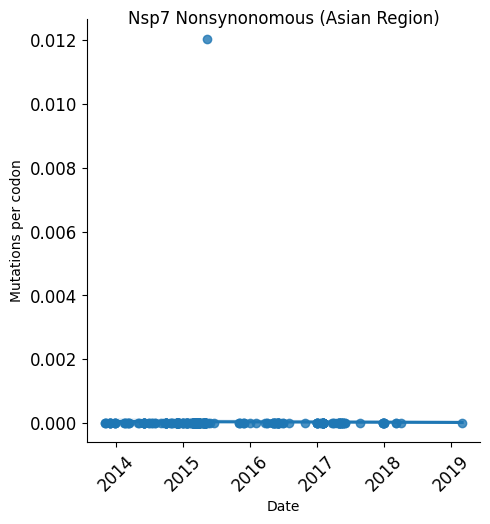

Camel slope: -5.67684835587131e-06 mutations per codon per year
P = 0.878107860243284


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

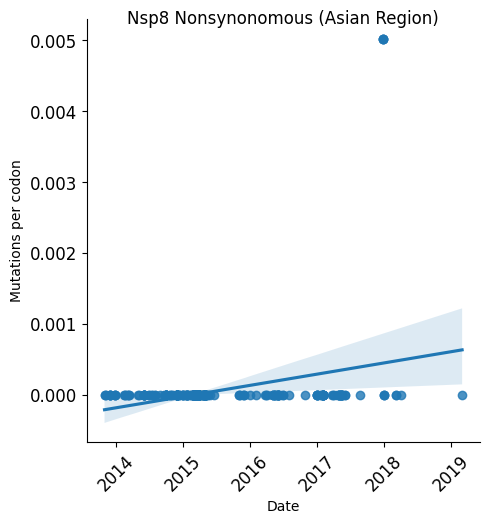

Camel slope: 0.0001583234449652371 mutations per codon per year
P = 1.4675746392163093e-07


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

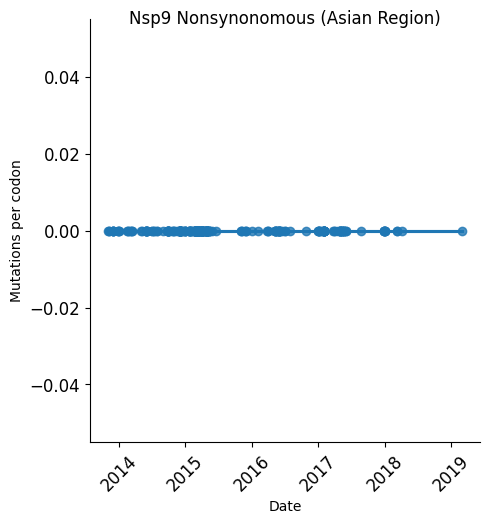

Camel slope: 0.0 mutations per codon per year
P = 1.0


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

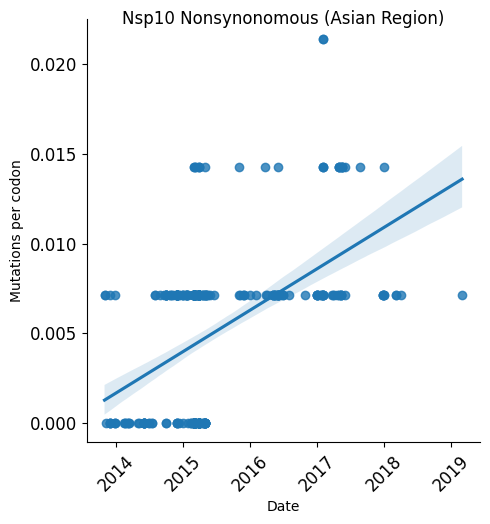

Camel slope: 0.0023123887250426443 mutations per codon per year
P = 1.0650607939195102e-22


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

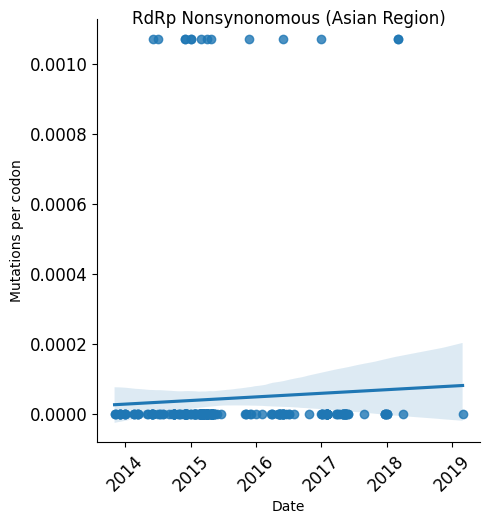

Camel slope: 1.0290392085409527e-05 mutations per codon per year
P = 0.3941013608512959


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

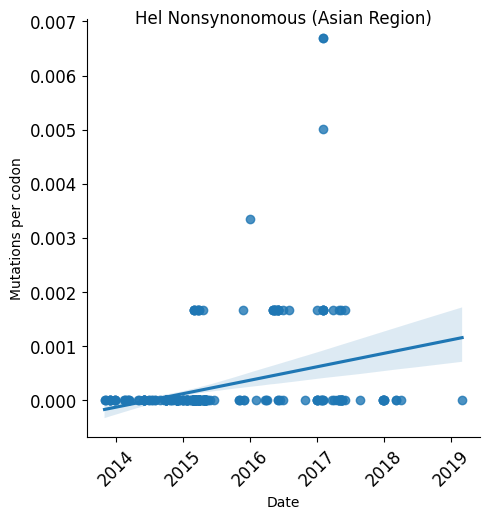

Camel slope: 0.00024902629332218627 mutations per codon per year
P = 9.437577592967832e-09


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

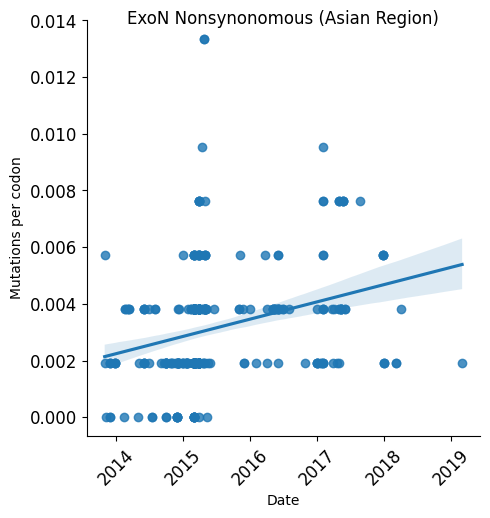

Camel slope: 0.0006101192510357257 mutations per codon per year
P = 2.585418539011155e-08


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

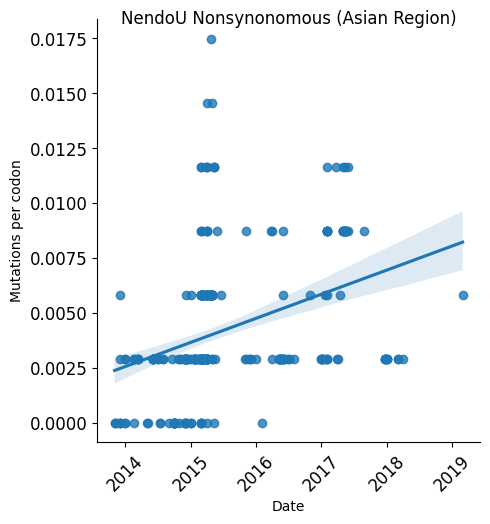

Camel slope: 0.0010959151651639516 mutations per codon per year
P = 1.0741311467182988e-11


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

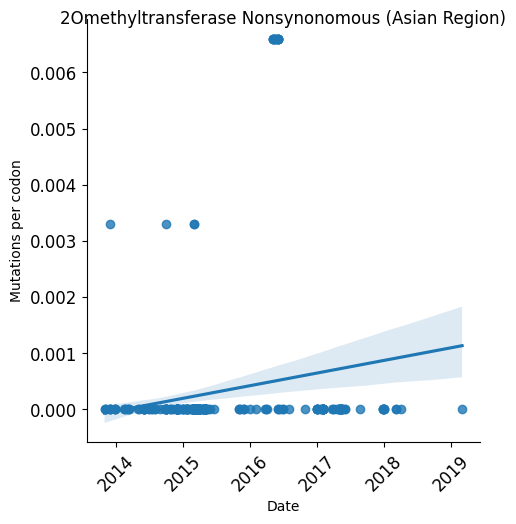

Camel slope: 0.00022525199390662921 mutations per codon per year
P = 0.003098283047052953


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

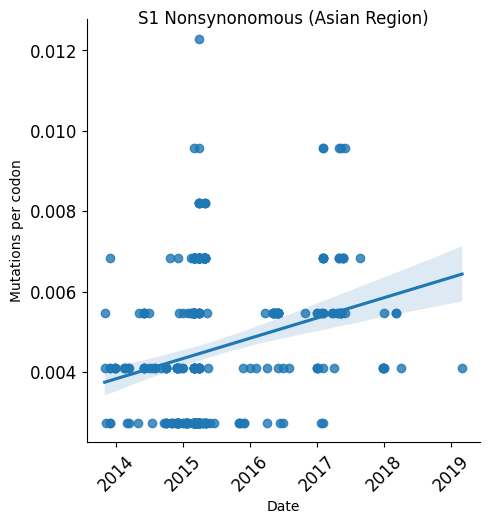

Camel slope: 0.0005050159232582716 mutations per codon per year
P = 5.599200570740498e-07


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

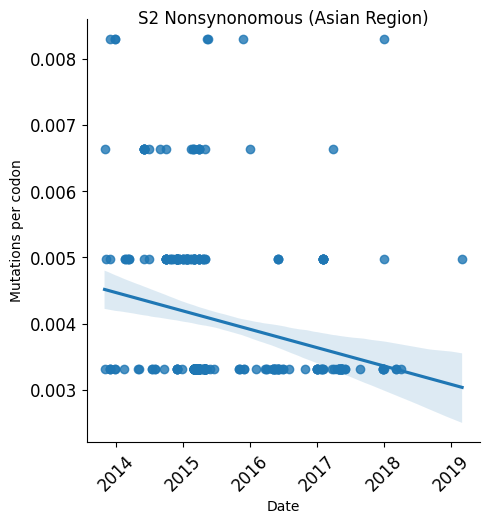

Camel slope: -0.0002776487776005685 mutations per codon per year
P = 2.357369257909286e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

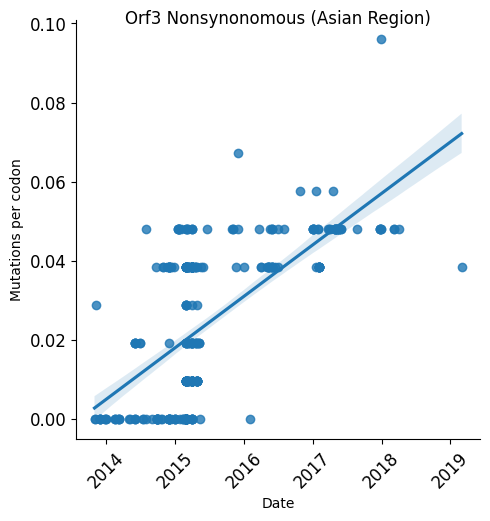

Camel slope: 0.013021325602871484 mutations per codon per year
P = 2.8942275894152436e-41


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

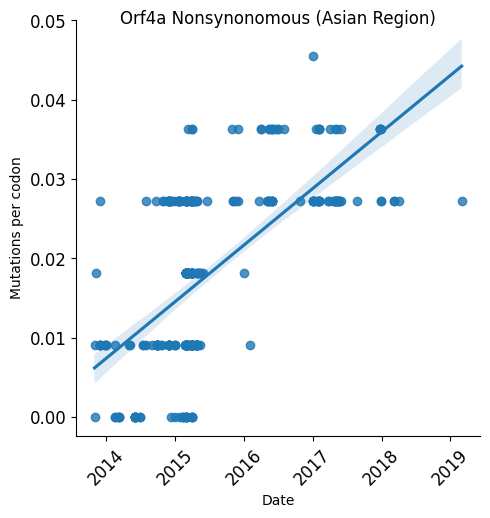

Camel slope: 0.007136563564961769 mutations per codon per year
P = 2.2017974472199777e-40


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

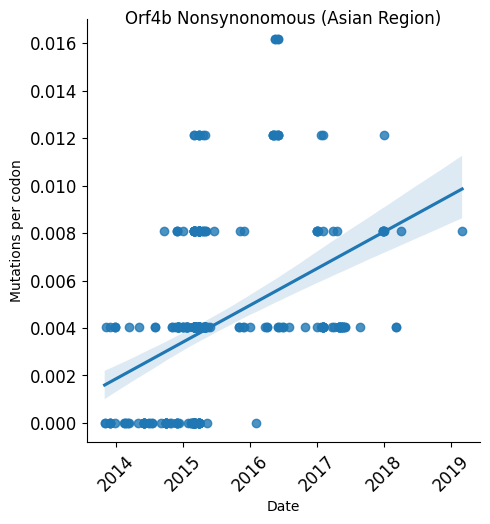

Camel slope: 0.0015504273054370427 mutations per codon per year
P = 3.425141544840628e-15


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

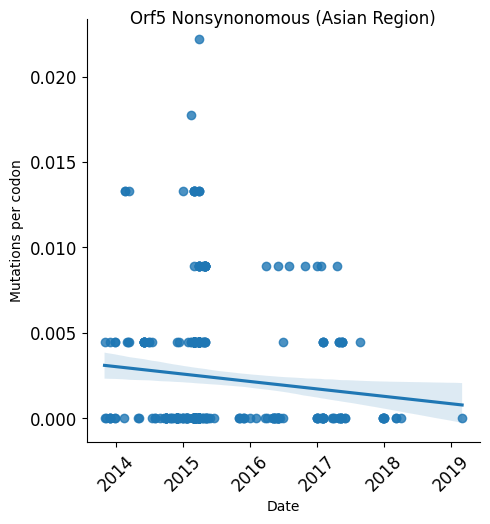

Camel slope: -0.00043485147952865803 mutations per codon per year
P = 0.04129333275580456


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

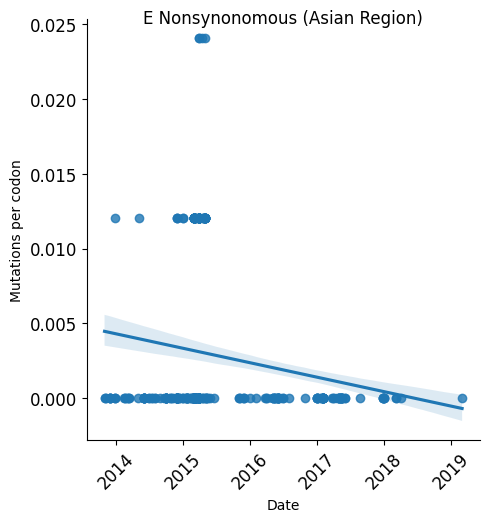

Camel slope: -0.0009689068600696392 mutations per codon per year
P = 0.001538743795839393


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

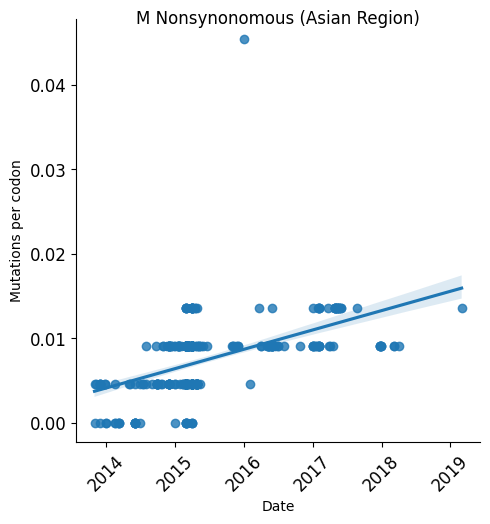

Camel slope: 0.0022889306416712554 mutations per codon per year
P = 5.62127834017135e-25


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

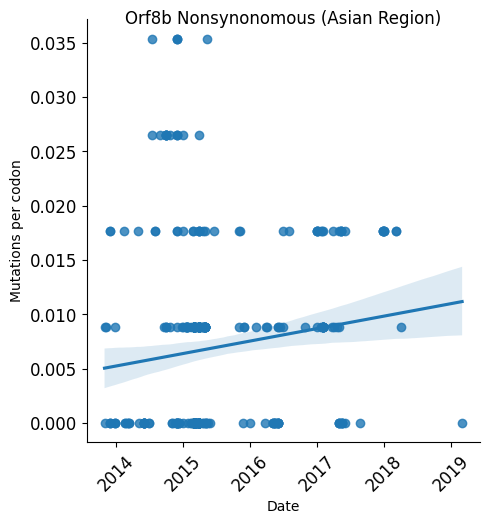

Camel slope: 0.001150868910089644 mutations per codon per year
P = 0.01307076944400916


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

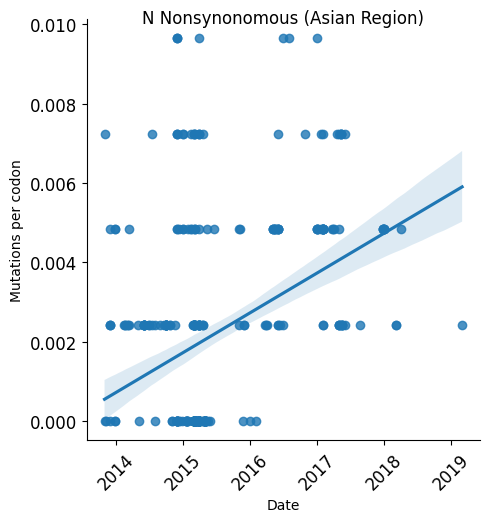

Camel slope: 0.001005190819421433 mutations per codon per year
P = 1.0243992918116013e-12
[0.0023982317958661436, 0.0006375706239992616, 0.0014534494963091417, 0.0007416330529745921, 5.983976678965661e-05, 0.0001274257458742153, -5.67684835587131e-06, 0.0001583234449652371, 0.0, 0.0023123887250426443, 1.0290392085409527e-05, 0.00024902629332218627, 0.0006101192510357257, 0.0010959151651639516, 0.00022525199390662921, 0.0005050159232582716, -0.0002776487776005685, 0.013021325602871484, 0.007136563564961769, 0.0015504273054370427, -0.00043485147952865803, -0.0009689068600696392, 0.0022889306416712554, 0.001150868910089644, 0.001005190819421433]


<Figure size 640x480 with 0 Axes>

In [78]:
all_genes_simplified = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRp",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]
lin_regress = {}
lin_regress_all = {}
slopes = list(range(0, len(all_genes_simplified)))
count = 0
camel_df = df
for gene in all_genes_simplified:
    gene_lower = gene.lower()
    plt.figure(gene)
    plot = sns.lmplot(x="date", y=gene_lower, data=df)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mutations per codon')
    plt.title(gene + ' Nonsynonomous (Asian Region)', y=0.97)
    plt.show()
    plt.savefig("../../../intermediate-results-downsampling/isolating_clade/mutation_rate_per_gene/" + gene + "figure.png")
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}

    x=camel_df['date'].values
    y=camel_df[gene_lower].values
    camel_slope, camel_intercept, camel_r, camel_p, camel_se = stats.linregress(x, y)
    lin_regress[gene]['Camel'] = camel_slope
    lin_regress_all[gene]['Camel'] = {'slope':camel_slope, 'intercept':camel_intercept, 'r': camel_r, 'p': camel_p, 'se':camel_se}
    slopes[count] = camel_slope
    print("Camel slope: " + str(camel_slope) + " mutations per codon per year"),
    print("P = " + str(camel_p))
    count += 1

print(slopes)
df_results = pd.DataFrame(lin_regress)
df_results_all = pd.DataFrame(lin_regress_all)
linear_regression_results = df_results.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results.csv')
linear_regression_results_all = df_results_all.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results_all.csv')

25
25


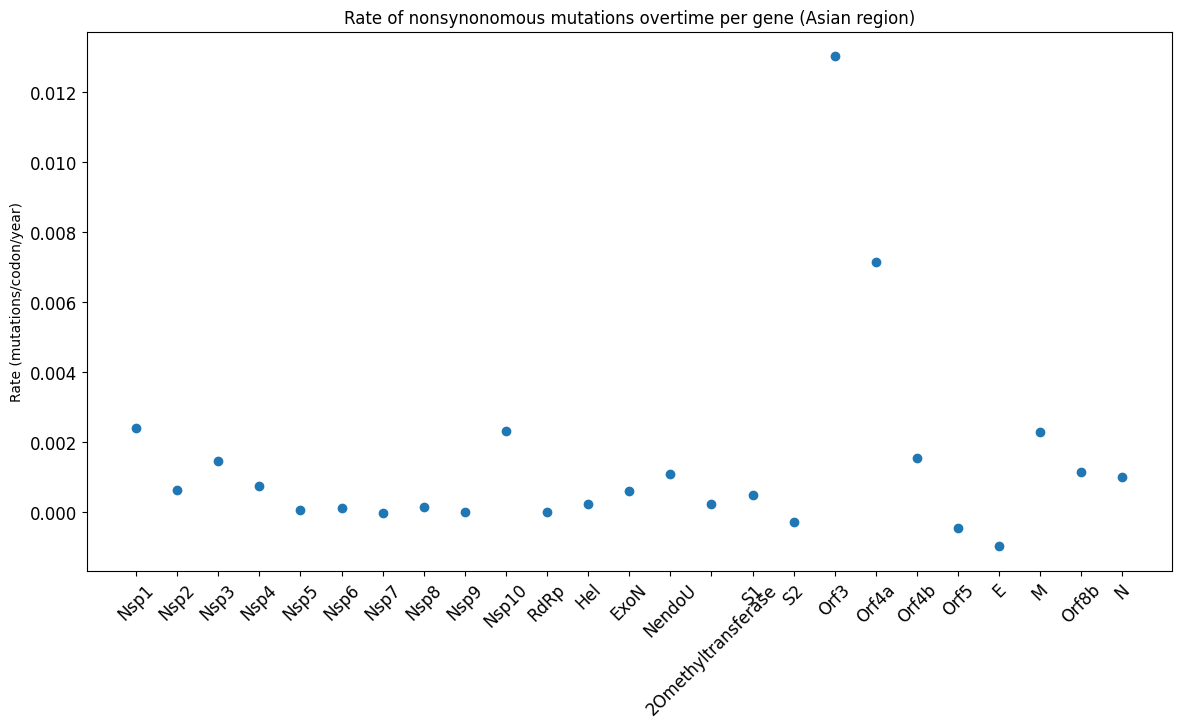

[0.0023982317958661436, 0.0006375706239992616, 0.0014534494963091417, 0.0007416330529745921, 5.983976678965661e-05, 0.0001274257458742153, -5.67684835587131e-06, 0.0001583234449652371, 0.0, 0.0023123887250426443, 1.0290392085409527e-05, 0.00024902629332218627, 0.0006101192510357257, 0.0010959151651639516, 0.00022525199390662921, 0.0005050159232582716, -0.0002776487776005685, 0.013021325602871484, 0.007136563564961769, 0.0015504273054370427, -0.00043485147952865803, -0.0009689068600696392, 0.0022889306416712554, 0.001150868910089644, 0.001005190819421433]


In [79]:
gene_names = list(all_genes_simplified)
plt.figure(figsize=(14,7))
print(len(gene_names))
print(len(slopes))
plt.scatter(gene_names, slopes)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.ylabel("Rate (mutations/codon/year)")
plt.title("Rate of nonsynonomous mutations overtime per gene (Asian region)")
plt.show()
print(slopes)